>> 파이토치의 학습 과정

1. 모델 정의
2. 모델 순전파
3. 오차 계산
4. 오차 역전파(가중치 업데이트)-원하는만큼 반복
5. 학습종료

### 3.1 랜덤하기 가중치를 적용해서 사인곡선 그리기

In [1]:
import math
import torch
import matplotlib.pyplot as plt

In [2]:
# 1. -pi부터 pi사이에서 점을 1,000개 추출
x=torch.linspace(-math.pi, math.pi, 1000)

In [3]:
# 2. 실제 사인곡선에서 추출한 값으로 y 만들기
y=torch.sin(x)

In [6]:
# 3. 예측 사인곡선에 사용할 임의의 가중치(계수)를 뽑아 y만들기
a=torch.randn(())
b=torch.randn(())
c=torch.randn(())
d=torch.randn(())
y_random=a*x**3+b*x**2+c*x**c+d

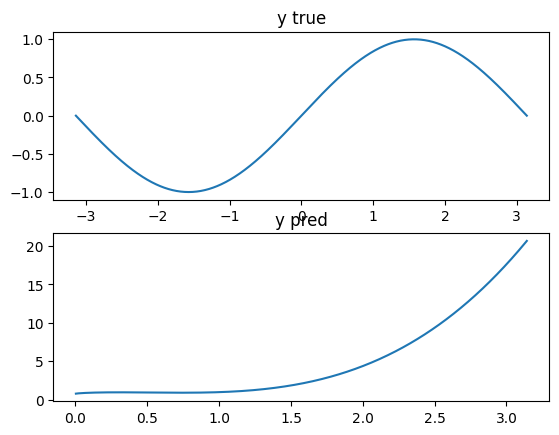

In [9]:
# 4. 실제 사인곡선을 실제 y값으로 만들기
plt.subplot(2,1,1) # 여러 개의 그래프를 그려줌
plt.title("y true")
plt.plot(x,y)
# 5. 예측 사인곡선을 임의의 가중치로 만든 y값으로 만들기
plt.subplot(2,1,2)
plt.title("y pred")
plt.plot(x,y_random)
plt.show()

epoch1 loss:19.691469192504883
epoch101 loss:17.23236656188965
epoch201 loss:15.170352935791016
epoch301 loss:13.44115924835205
epoch401 loss:11.9909086227417
epoch501 loss:10.77448558807373
epoch601 loss:9.754096031188965
epoch701 loss:8.898085594177246
epoch801 loss:8.179900169372559
epoch901 loss:7.577305316925049
epoch1001 loss:7.071654796600342
epoch1101 loss:6.647310256958008
epoch1201 loss:6.291178226470947
epoch1301 loss:5.992264270782471
epoch1401 loss:5.741362571716309
epoch1501 loss:5.530747890472412
epoch1601 loss:5.353934288024902
epoch1701 loss:5.2054877281188965
epoch1801 loss:5.080854415893555
epoch1901 loss:4.976202011108398


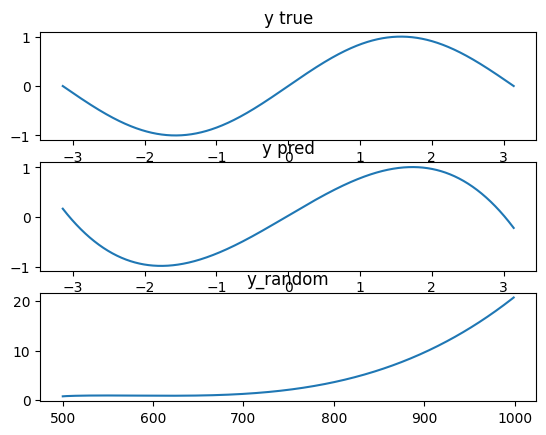

In [12]:
# 가중치를 학습시켜서 사인곡선 그리기
learning_rate=1e-6

#학습 2,000번 진행
for epoch in range(2000):
    y_pred=a*x**3 + b*x**2 + c*x + d
    # 손실 정의
    loss = (y_pred-y).pow(2).sum().item() #item은 실수값으로 변환하라는 뜻
    if epoch % 100 == 0:
        print(f"epoch{epoch+1} loss:{loss}")
    
    # 기울기의 미분값
    grad_y_pred=2.0*(y_pred-y)
    grad_a = (grad_y_pred*x**3).sum()
    grad_b = (grad_y_pred*x**2).sum()
    grad_c = (grad_y_pred*x).sum()
    grad_d = grad_y_pred.sum()

    # 가중치 업데이트
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

# 실제 사인 곡선 그리기
plt.subplot(3,1,1)
plt.title("y true")
plt.plot(x,y)

# 예측한 가중치의 사인 곡선을 그리기
plt.subplot(3,1,2)
plt.title("y pred")
plt.plot(x, y_pred)

# 랜덤한 가중치의 사인 곡선 그리기(학습 전 그래프)
plt.subplot(3,1,3)
plt.title("y_random")
plt.plot(y_random)

### 3.2 보스턴 집값 예측하기: 회귀 분석

In [14]:
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [16]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [19]:
import torch
import torch.nn as nn
from torch.optim.adam import Adam

# 모델 정의
model = nn.Sequential(
    nn.Linear(13,100), #입력이 13개=feature가  13개
    nn.ReLU(),
    nn.Linear(100,1) #출력이 한개
)

batch_size=100
learning_rate=0.001


# 가중치를 수정하는 최적화 함수 정의
optim = Adam(model.parameters(), lr = learning_rate)

# 에포크 반복
for epoch in range(200):

    # 배치 반복
    for i in range(int(len(data)/batch_size)):
        start = i*batch_size
        end = start+batch_size
        #파이토치 실수형 텐서로 변환
        x=torch.FloatTensor(data[start:end])
        y=torch.FloatTensor(target[start:end])

        optim.zero_grad() #가중치의 기울기를 0으로 초기화
        preds=model(x) #모델의 예측값 계산
        loss=nn.MSELoss()(preds, y) #MSE 손실 계산
        loss.backward() #오차 역전파
        optim.step() #최적화 진행
    if epoch%20 == 0:
        print(f"epoch{epoch} loss:{loss.item()}")

c:\Users\user\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch0 loss:3391.594482421875
epoch20 loss:60.88749313354492
epoch40 loss:42.393741607666016
epoch60 loss:40.1597900390625
epoch80 loss:39.379764556884766
epoch100 loss:38.98176956176758
epoch120 loss:38.67321014404297
epoch140 loss:38.4581298828125
epoch160 loss:38.244773864746094
epoch180 loss:38.17724609375


In [22]:
prediction = model(torch.FloatTensor(data[0, :13]))
real = target[0]
print(f"prediction:{prediction.item()} real:{real}")

prediction:26.554208755493164 real:24.0


### 3.3 손글씨 분류하기 : 다중분류

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:03<00:00, 3302104.75it/s]


Extracting ./MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 152560.58it/s]


Extracting ./MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1303571.51it/s]


Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2285332.15it/s]


Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\raw

60000
10000


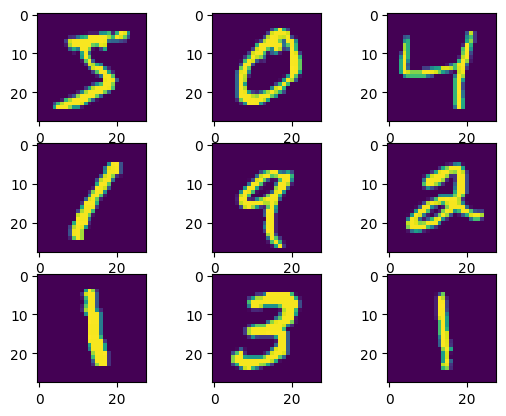

In [23]:
import matplotlib.pyplot as plt

from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

# 1. 학습용 데이터와 평가용 데이터 분리
training_data = MNIST(root="./", train=True, download=True, transform=ToTensor())
test_data = MNIST(root="./", train=False, download=True, transform=ToTensor())

print(len(training_data))
print(len(test_data))

for i in range(9): #샘플 이미지 9개 출력
    plt.subplot(3,3,i+1)
    plt.imshow(training_data.data[i])

In [27]:
# 데이터 불러오기
# Dataloader(): 학습에 사용할 배치를 자동으로 반환하는 메서드

from torch.utils.data.dataloader import DataLoader

train_loader = DataLoader(training_data, batch_size=32, shuffle=True)

#평가용 데이터는 섞을 필요가 없음
test_loader=DataLoader(test_data, batch_size=32, shuffle=False)

In [28]:
# 모델 정의 및 학습하기
import torch
import torch.nn as nn

from torch.optim.adam import Adam
device="cuda" if torch.cuda.is_available() else "cpu"

model=nn.Sequential(
    nn.Linear(784, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)
model.to(device) #모델의 파라미터를 gpu로 보냄

lr = 1e-3
optim = Adam(model.parameters(), lr=lr)

for epoch in range(20):
    for data, label in train_loader:
        optim.zero_grad()
        # 입력 데이터 모양을 모델의 입력에 맞게 변환
        data = torch.reshape(data, (-1, 784)).to(device) #이미지를 벡터화
        preds = model(data)

        loss = nn.CrossEntropyLoss()(preds, label.to(device)) #회귀에는 mse, 분류에는 ce를 사용
        #ce는 확률분포의 차이를 나타냄
        loss.backward() #오차 역전파
        optim.step() #최적화 진행
    print(f"epoch{epoch+1} loss:{loss.item()}")

torch.save(model.state_dict(), "MNIST.pth")

epoch1 loss:0.1346738040447235
epoch2 loss:0.09300155192613602
epoch3 loss:0.024791816249489784
epoch4 loss:0.3694806396961212
epoch5 loss:0.40033766627311707
epoch6 loss:0.008004186674952507
epoch7 loss:0.2670361399650574
epoch8 loss:0.004163697827607393
epoch9 loss:0.003570338012650609
epoch10 loss:0.007364458870142698
epoch11 loss:0.00095050607342273
epoch12 loss:0.11737161874771118
epoch13 loss:0.19885334372520447
epoch14 loss:0.04818045347929001
epoch15 loss:0.003987108822911978
epoch16 loss:0.0034125044476240873
epoch17 loss:0.0011677511502057314
epoch18 loss:0.003579238895326853
epoch19 loss:0.006750387139618397
epoch20 loss:0.00044249388156458735


In [29]:
# 모델 성능 평가하기
# 모델 가중치 불러오기
model.load_state_dict(torch.load("MNIST.pth", map_location=device))
num_corr=0 #분류에 성공한 전체 개수

with torch.no_grad(): #기울기를 계산하지 않음 =  평가과정이라 가중치 업데이트할 필요없음=>메모리와 계산량이 줄어드니까 반드시 호출해야함
    for data, label in test_loader:
        data=torch.reshape(data, (-1, 784)).to(device)

        output=model(data.to(device))
        preds=output.data.max(1)[1] 
        #max(0)은 배치에서 가장 높은 값을 갖는 값
        #max(1)은 클래스차원에서 가장 높은 값
        # max()의 결과는 최대 예측값, 최대 예측값의 인덱스로 묶어서 반환

        corr=preds.eq(label.to(device).data).sum().item()

        num_corr+=corr

    print(f"Accuracy:{num_corr/len(test_data)}") #분류 정확도 출력

Accuracy:0.9694
